# Secao 2: Especificação e Equalização de Histogramas na Prática

## Configurações do Projeto e Funções úteis


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calcular_histograma(imagem):    
    histograma = np.zeros(256, dtype=int)
        
    for valor in imagem.flatten():  
        histograma[valor] += 1  
    
    return histograma


## Equalização de Histograma

A equalização de histograma é um método que redistribui a intensidade dos pixels de uma imagem para melhorar o contraste. Esse processo é útil em situações onde a imagem tem pouca variação de intensidade, facilitando a visualização de detalhes.

In [26]:
def equalizar_histograma(imagem):    
    histograma = calcular_histograma(imagem)
    
    cdf = histograma.cumsum()  
    cdf_normalizado = cdf * (255 / cdf[-1])  
    
    imagem_equalizada = np.interp(imagem.flatten(), np.arange(256), cdf_normalizado)  
    imagem_equalizada = imagem_equalizada.reshape(imagem.shape)  

    return imagem_equalizada.astype(np.uint8)


- ***Cálculo do Histograma:*** Chama a função calcular_histograma para obter o histograma da imagem original.
- ***Cálculo da Função de Distribuição Acumulada (CDF):*** Utiliza` cumsum()` para calcular a soma cumulativa do histograma, resultando em uma CDF que indica a frequência acumulada de cada nível de intensidade.
- ***Normalização da CDF:*** A CDF é normalizada para o intervalo de 0 a 255. Isso assegura que a nova distribuição de intensidades de pixel se adapte à gama completa de valores de intensidade.
- ***Interpolação:*** A função `np.interp` é usada para mapear os valores de pixel da imagem original para a nova distribuição normalizada.
- ***Reformatação da Imagem:*** A imagem equalizada é reformulada para suas dimensões originais e convertida para o tipo uint8.

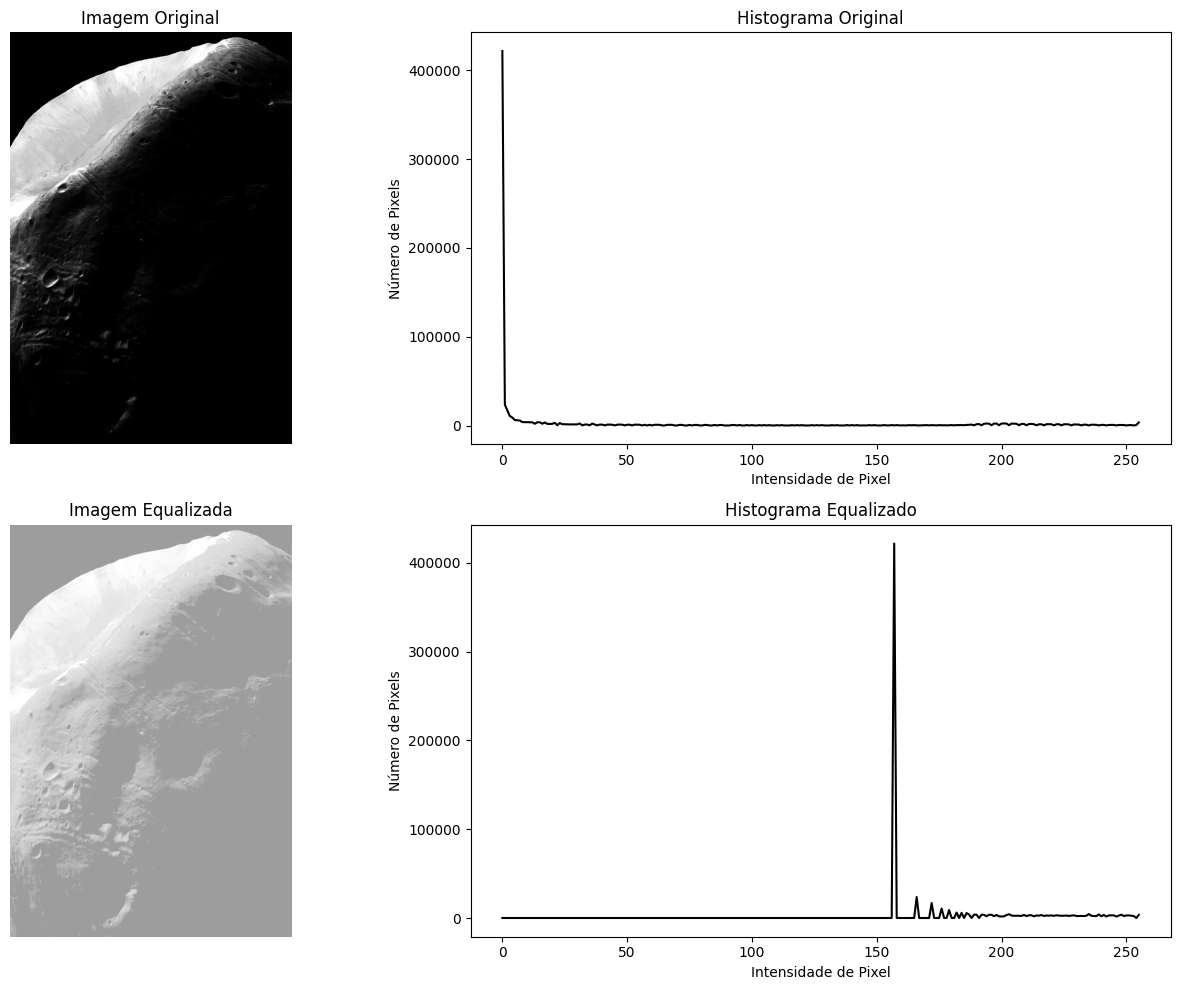

In [27]:

imagem = cv2.imread('images/lua_marte.tif', cv2.IMREAD_GRAYSCALE)

imagem_equalizada = equalizar_histograma(imagem)

plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.plot(calcular_histograma(imagem), color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')


plt.subplot(2, 2, 3)
plt.imshow(imagem_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Equalizada')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.plot(calcular_histograma(imagem_equalizada), color='black')
plt.title('Histograma Equalizado')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

plt.tight_layout()
plt.show()


## Especificação de Histograma

Ao contrário da equalização, a especificação de histograma ajusta a distribuição de intensidades da imagem original de forma controlada, suavizando as transições entre diferentes níveis de intensidade, especialmente nas áreas escuras.



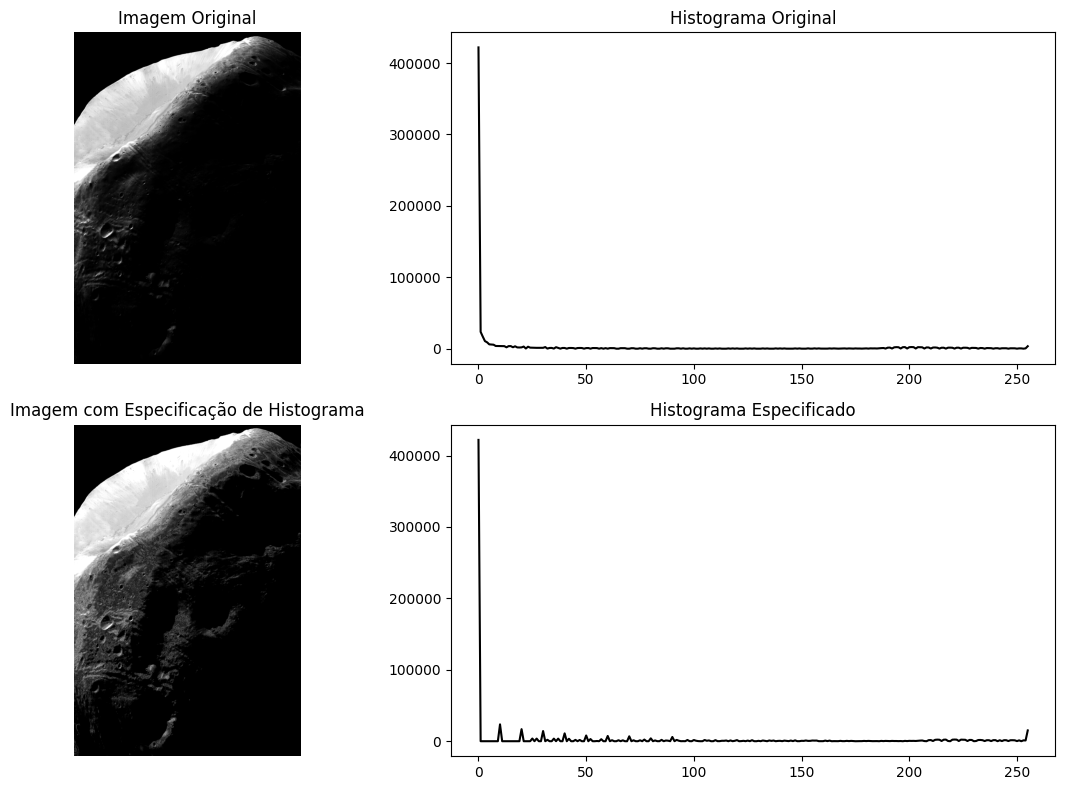

In [28]:


def especificar_histograma_manual(imagem):    
    funcao_transformacao = np.zeros(256, dtype=float)    
    
    for i in range(256):
        if i < 10:
            funcao_transformacao[i] = i * 10 
        elif i < 64:
            funcao_transformacao[i] = i * 2.5 
        elif i < 128:
            funcao_transformacao[i] = i* 1.3  
        else:
            funcao_transformacao[i] = i * 1.1      
    
    funcao_transformacao = np.clip(funcao_transformacao, 0, 255) 
    imagem_especificada = np.interp(imagem.flatten(), np.arange(256), funcao_transformacao)    
    
    return imagem_especificada.reshape(imagem.shape).astype(np.uint8)

imagem = cv2.imread('images/lua_marte.tif', cv2.IMREAD_GRAYSCALE)
imagem_especificada = especificar_histograma_manual(imagem)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(calcular_histograma(imagem), color='black')
plt.title('Histograma Original')

plt.subplot(2, 2, 3)
plt.imshow(imagem_especificada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem com Especificação de Histograma')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(calcular_histograma(imagem_especificada), color='black')
plt.title('Histograma Especificado')

plt.tight_layout()
plt.show()


### Processo de especificação do Histograma

A função `especificar_histograma_manual` é projetada para ajustar a intensidade dos pixels de uma imagem em escala de cinza de maneira controlada. A função define transformações específicas para diferentes faixas de intensidade: 
- Para intensidades abaixo de `64`, a transformação é `i * 2`, o que ilumina as áreas escuras;
- Para intensidades entre `64` e `127`, `i * 1.3` é aplicado, o que suaviza e aumenta os tons médios; 
- Para intensidades acima de `128`, `i * 1.1` é utilizado, resultando em um leve aumento na intensidade das áreas mais claras.

 Depois de definir a transformação, a função utiliza `np.clip` para garantir que os valores resultantes permaneçam dentro do intervalo permitido (0 a 255). Por fim, a transformação é aplicada à imagem usando `np.interp`, que mapeia os valores de pixel originais para os novos valores especificados, retornando a imagem resultante em sua forma original e convertida para o tipo `uint8`. Essa abordagem resulta em uma imagem que preserva a estrutura original do histograma enquanto suaviza as transições e melhora a iluminação geral.

## Comparando as 3 imagens

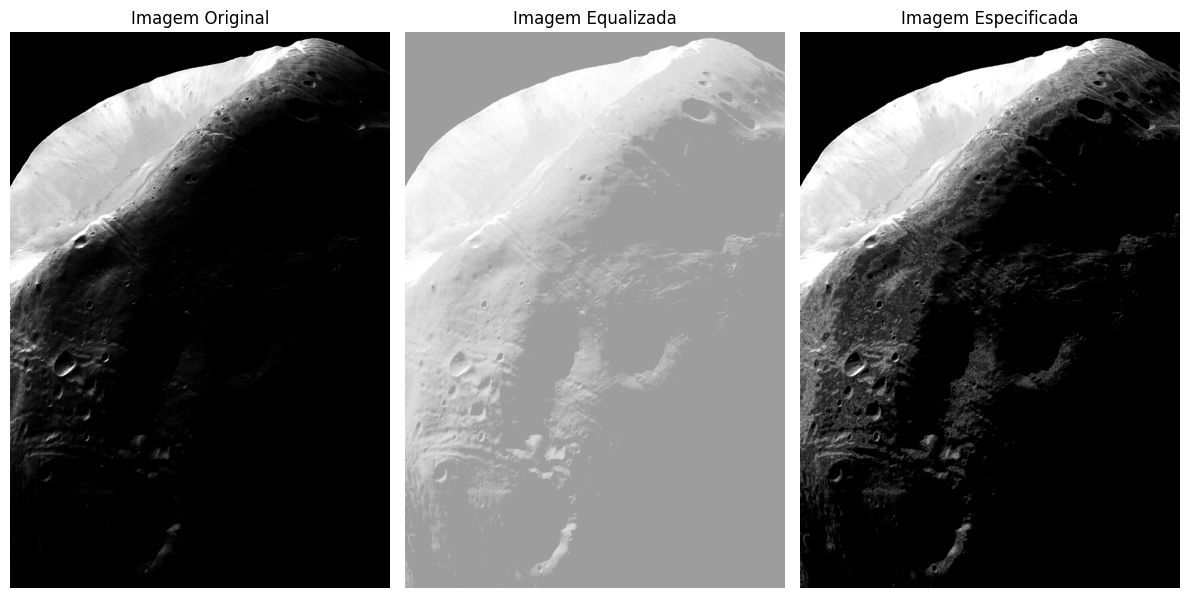

In [30]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(imagem_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagem_especificada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Especificada')
plt.axis('off')

plt.tight_layout()
plt.show()

## Discussão e resultados

A ***equalização*** de histograma melhora o contraste redistribuindo as intensidades, mas pode desbotar a imagem, especialmente em áreas escuras. Em caso onde a imagem seja muito escura com o histograma tendendo para o lado esquerdo, a equalização pode clarear em demasia a imagem.

A ***especificação*** de histograma, por sua vez, oferece um controle mais preciso, permitindo ajustar o histograma de forma personalizada, preservando detalhes nas sombras sem comprometer as áreas claras. Isso a torna mais eficaz em cenários que exigem ajustes mais sutis, como em imagens de segurança e médicas.